# Francis QR step

### References

* Lawson, C. L,. and Hanson, R. J. (1995). Solving least squares problems. SIAM, ISBN 0-89871-356-0

* Golub, G. H. and C. F. Van Loan, (2013), Matrix computations, 4th edition, Johns Hopkins University Press, ISBN 978-1-4214-0794-4.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import plot_functions as plf
import matcomp_algorithms as mca
np.set_printoptions(precision=3, suppress=True)
#np.set_printoptions(suppress=True)

In [3]:
import matcomp_algorithms as mca

### Definition

Given the unreduced upper Hessenberg matrix $\mathbf{H} \in \mathbb{R}^{N \times N}$, whose trailing 2-by-2 principal submatrix has eigenvalues $a_{0}$ and $a_{1}$, this algorithm overwrites $\mathbf{H}$ with $\mathbf{Z}^{\top}\mathbf{H}\mathbf{Z}$, where $\mathbf{Z}$ is a product of Householder matrices and $\mathbf{Z}^{\top}(\mathbf{H} - a_{0} \, \mathbf{I})(\mathbf{H} - a_{1} \, \mathbf{I})$ is upper triangular.

For details about Householder matrices, take a look at the notebook [`Householder_transformation`](https://github.com/birocoles/Matrix-Computations/blob/main/code/Householder_transformation.ipynb)).

### Create a matrix $\mathbf{A}$

In [4]:
np.random.seed(77)
N = 6

In [5]:
A = np.random.rand(N,N)

### Compute an upper Hessenberg matrix $\mathbf{H}$ from $\mathbf{A}$

In [6]:
H = A.copy()
mca.upper_Hessen_House(H)
H = np.triu(m=H,k=-1)

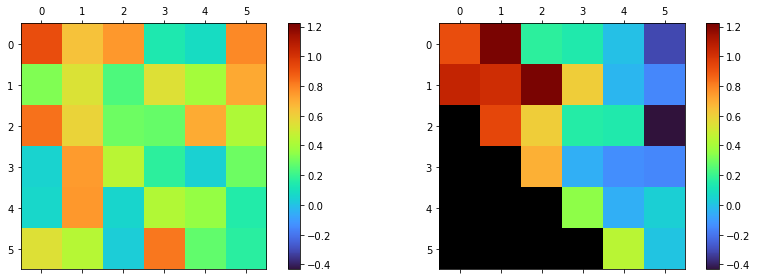

In [7]:
plf.plot_matrices(matrices=[A, H], size=(12,4), tol=1e-15, shape=(1,2))

### Pseudo-code of the Francis QR step (Golub and Van Loan, 2013, Algorithm 7.5.1, p. 390)

    H = H0;
    n = length(H);
    if n<=2
        return
    end
    m = n-1;
    % Compute the first column of (H-alfa1*I)(H-alfa2*I)) where
    % alfa 1 and alfa2 are the eigenvalues of the lower 2x2...
    s = H(m,m)+H(n,n);
    t = H(m,m)*H(n,n) - H(m,n)*H(n,m);
    x = H(1,1)*H(1,1)+H(1,2)*H(2,1) - s*H(1,1) + t;
    y = H(2,1)*(H(1,1)+H(2,2)-s);
    z = H(2,1)*H(3,2);
    % Chase the bulge...
    for k=0:n-3
        [v,beta] = House([x;y;z]);
        q = max(1,k);
        H(k+1:k+3,q:n) =  H(k+1:k+3,q:n) - (beta*v)*(v'*H(k+1:k+3,q:n));
        r = min(k+4,n);
        H(1:r,k+1:k+3) =  H(1:r,k+1:k+3) - (H(1:r,k+1:k+3)*v)*(beta*v)';
        x = H(k+2,k+1);
        y = H(k+3,k+1);
        if k<n-3
            z = H(k+4,k+1);
        end
    end
    [v,beta] = House([x;y]);
    H(n-1:n,n-2:n) = H(n-1:n,n-2:n) - (beta*v)*(v'*H(n-1:n,n-2:n));
    H(1:n,n-1:n) = H(1:n,n-1:n) - (H(1:n,n-1:n)*v)*(beta*v)';

In [8]:
for k in range(N-2):
    print(f'k = {k}')
    q = max(1,k)
    print(f'q = {q}')
    print(f'H({k+1}:{k+3},{q}:{N})')
    r = min(k+4,N)
    print(f'r = {r}')
    print(f'H(1:{r},{k+1}:{k+3})')
    print(f'x = H({k+2},{k+1})')
    print(f'y = H({k+3},{k+1})')
    if k < N-3:
        print(f'z = H({k+4},{k+1})')
    print('\n')

k = 0
q = 1
H(1:3,1:6)
r = 4
H(1:4,1:3)
x = H(2,1)
y = H(3,1)
z = H(4,1)


k = 1
q = 1
H(2:4,1:6)
r = 5
H(1:5,2:4)
x = H(3,2)
y = H(4,2)
z = H(5,2)


k = 2
q = 2
H(3:5,2:6)
r = 6
H(1:6,3:5)
x = H(4,3)
y = H(5,3)
z = H(6,3)


k = 3
q = 3
H(4:6,3:6)
r = 6
H(1:6,4:6)
x = H(5,4)
y = H(6,4)




### Compute the product $\mathbf{P}_{0} \, \mathbf{H} \, \mathbf{P}_{0}$

In [9]:
# Compute first column of M = (H - a1 I)(H - a2 I)

# Matlab code
# m = n-1;
# % Compute the first column of (H-alfa1*I)(H-alfa2*I)) where
# % alfa 1 and alfa2 are the eigenvalues of the lower 2x2...
# s = H(m,m)+H(n,n);
# t = H(m,m)*H(n,n) - H(m,n)*H(n,m);
# x = H(1,1)*H(1,1)+H(1,2)*H(2,1) - s*H(1,1) + t;
# y = H(2,1)*(H(1,1)+H(2,2)-s);
# z = H(2,1)*H(3,2);

s = H[-2,-2] + H[-1,-1]
t = H[-2,-2]*H[-1,-1] - H[-2,-1]*H[-1,-2]
x = H[0,0]*H[0,0] + H[0,1]*H[1,0] - s*H[0,0] + t
y = H[1,0]*(H[0,0] + H[1,1] - s)
z = H[1,0]*H[2,1]

# Compute matrix M
M = H@H - s*H + t*np.eye(N)

In [10]:
# Compute the QR decomposition of M

R2 = M.copy()
mca.QR_House(R2)
Z2 = mca.Q_from_QR_House(R2)
R2 = np.triu(R2)

In [11]:
np.allclose(Z2@R2, M)

True

In [12]:
# Verify that Z.T M is upper triangular

Z2.T@M

array([[ 3.159,  4.574,  3.548,  1.475, -0.162, -1.26 ],
       [-0.   ,  0.971,  0.799,  0.111,  0.092, -0.494],
       [ 0.   ,  0.   ,  0.509,  0.212, -0.12 , -0.012],
       [ 0.   ,  0.   , -0.   ,  0.217, -0.027,  0.046],
       [-0.   , -0.   , -0.   , -0.   ,  0.073, -0.039],
       [-0.   ,  0.   ,  0.   ,  0.   ,  0.   , -0.036]])

In [13]:
# Create lists to store the computed v, beta, products Pk ... P0 H P0 ... Pk
v = []
beta = []
products = [H]
P = []

# Create a copy of matrix H

ZTHZ = H.copy()

In [14]:
# Compute P0

vk, betak = mca.House_vector([x,y,z])
v.append(vk)
beta.append(betak)

Pk = np.identity(N)
Pk[:3,:3] -= betak*np.outer(vk,vk)
P.append(Pk)

In [15]:
products.append(P[0]@ZTHZ@P[0])

In [16]:
# Overwrite H with the product P0 H P0 without explicitly forming matrix P0

ZTHZ[:3,:] = mca.House_matvec(ZTHZ[:3,:], vk, betak, 'PA')
ZTHZ[:4,:3] = mca.House_matvec(ZTHZ[:4,:3], vk, betak, 'AP')

In [17]:
# Compare the results for P0 H P0
np.allclose(ZTHZ, products[1])

True

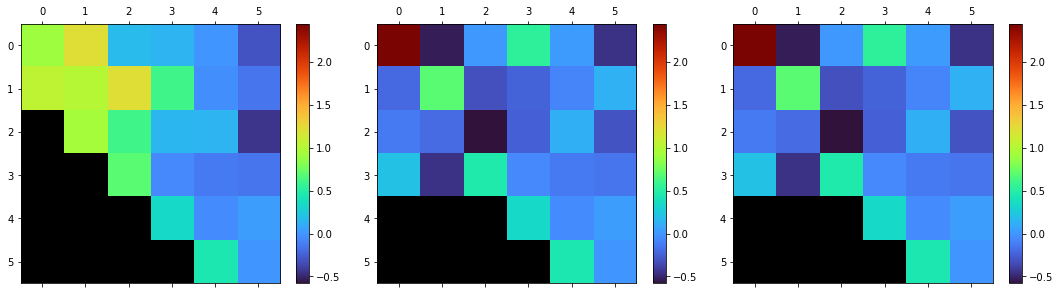

In [18]:
plf.plot_matrices(matrices=[H, products[1], ZTHZ], size=(15,4), tol=1e-15, shape=(1,3))

### Compute the successive products from columns $k = 0$ to $N - 4$

In [19]:
for k in range(0, N-3):

    x = ZTHZ[k+1, k]
    y = ZTHZ[k+2, k]
    z = ZTHZ[k+3, k]
    
    vk, betak = mca.House_vector([x,y,z])
    v.append(vk)
    beta.append(betak)
    
    Pk = np.identity(N)
    Pk[k+1:k+4,k+1:k+4] -= betak*np.outer(vk,vk)
    P.append(Pk)
    
    products.append(P[k+1]@ZTHZ@P[k+1])
    
    ZTHZ[k+1:k+4,k:] = mca.House_matvec(ZTHZ[k+1:k+4,k:], vk, betak, 'PA')
    ZTHZ[:k+5,k+1:k+4] = mca.House_matvec(ZTHZ[:k+5,k+1:k+4], vk, betak, 'AP')

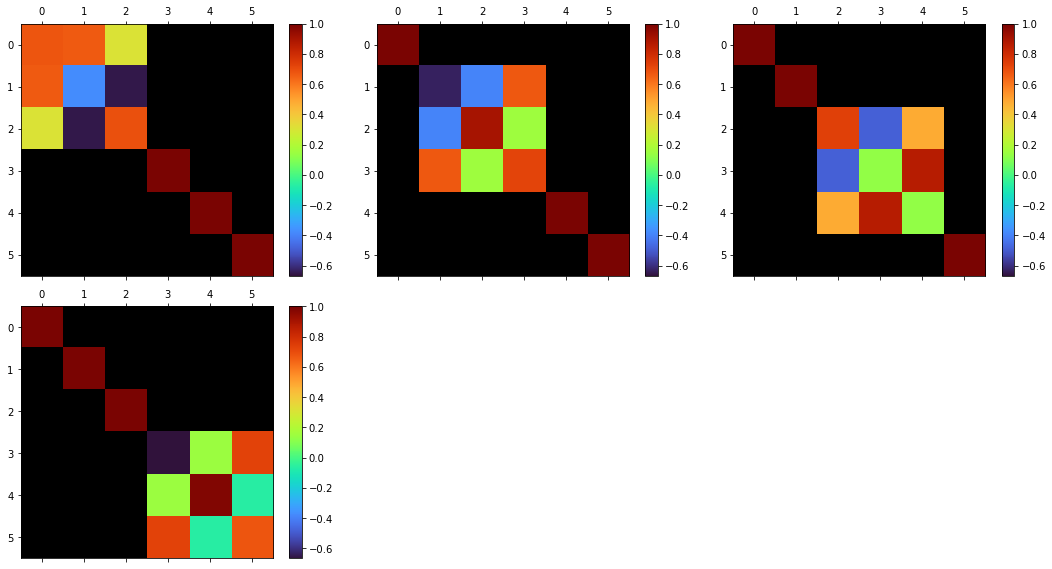

In [20]:
plf.plot_matrices(matrices=P, size=(15,8), tol=1e-15, shape=(2,3))

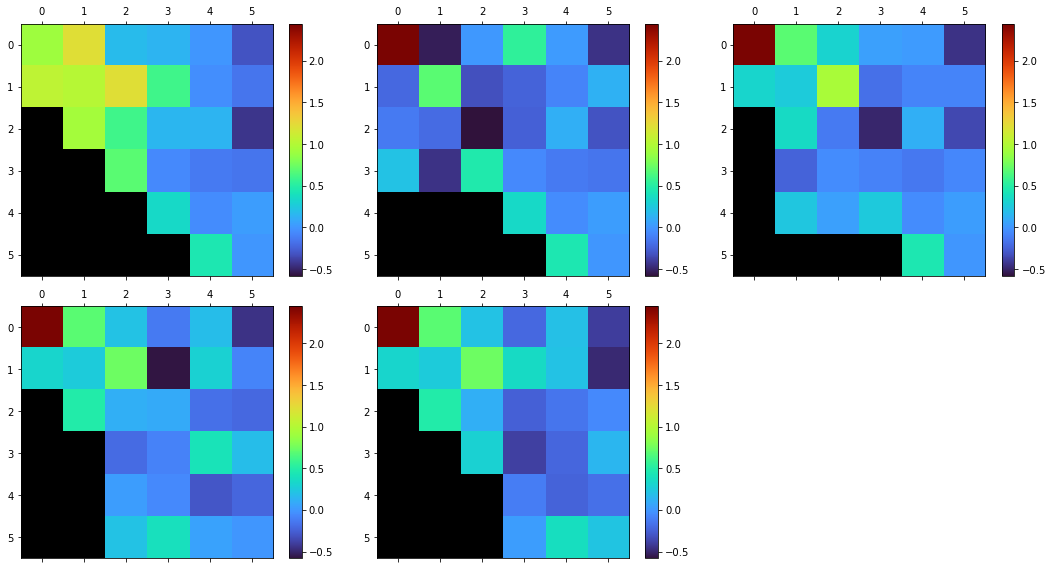

In [21]:
plf.plot_matrices(matrices=products, size=(15,8), tol=1e-15, shape=(2,3))

In [22]:
np.allclose(ZTHZ, products[-1])

True

### Compute the product for column $k = N - 3$

In [23]:
x = ZTHZ[N-2, N-3]
y = ZTHZ[N-1, N-3]
    
vk, betak = mca.House_vector([x,y])
v.append(vk)
beta.append(betak)
    
Pk = np.identity(N)
Pk[N-2:,N-2:] -= betak*np.outer(vk,vk)
P.append(Pk)

products.append(P[N-2]@ZTHZ@P[N-2])

ZTHZ[N-2:,N-3:] = mca.House_matvec(ZTHZ[N-2:,N-3:], vk, betak, 'PA')
ZTHZ[:,N-2:] = mca.House_matvec(ZTHZ[:,N-2:], vk, betak, 'AP')

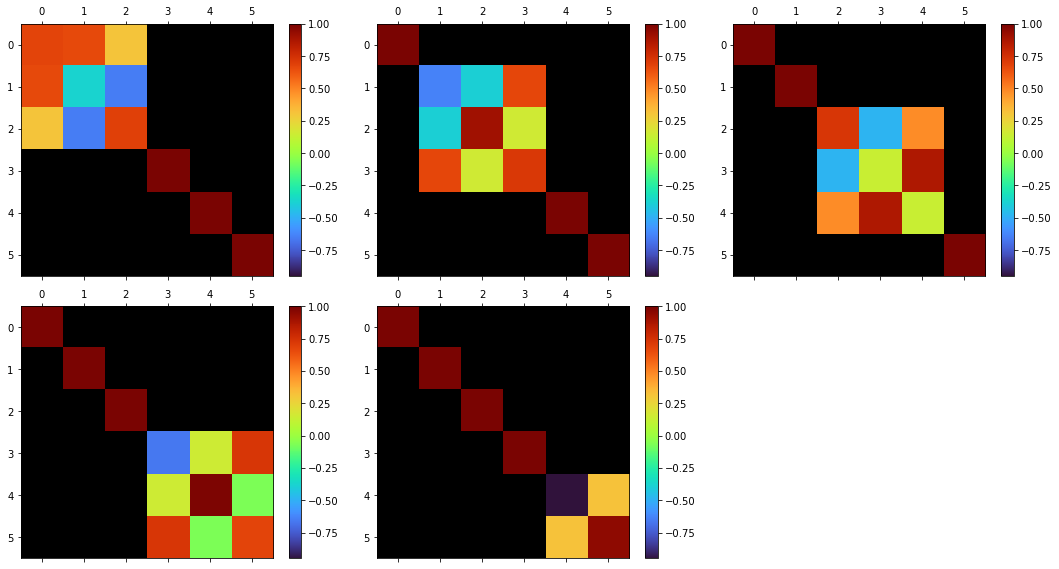

In [24]:
plf.plot_matrices(matrices=P, size=(15,8), tol=1e-15, shape=(2,3))

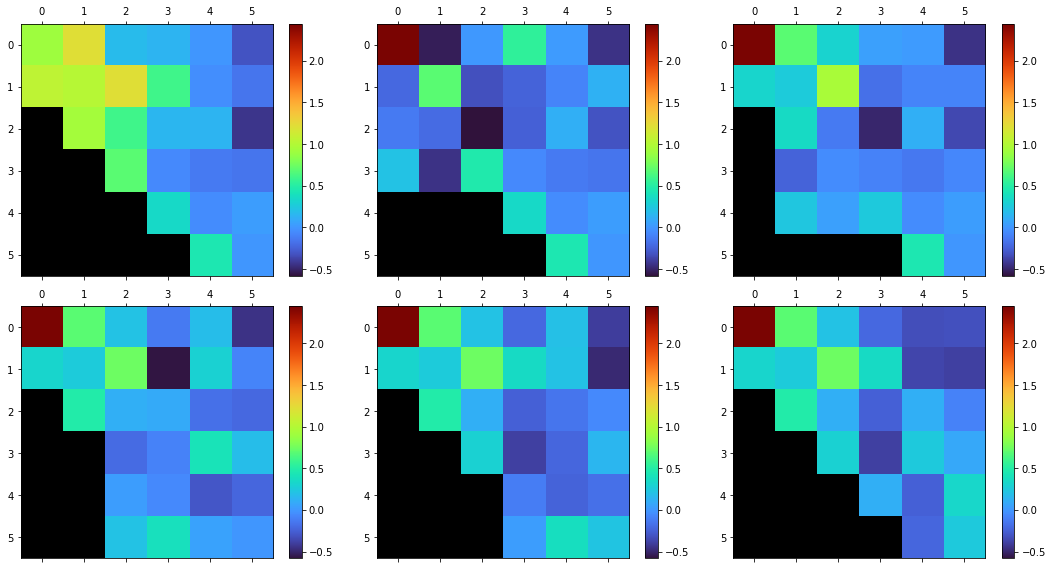

In [25]:
plf.plot_matrices(matrices=products, size=(15,8), tol=1e-15, shape=(2,3))

In [26]:
np.allclose(ZTHZ, products[-1])

True

### Compute matrix $\mathbf{Z}$

In [27]:
Z = np.linalg.multi_dot(P)

In [28]:
np.allclose(ZTHZ, Z.T@H@Z)

True

In [29]:
np.allclose(Z, Z2)

True

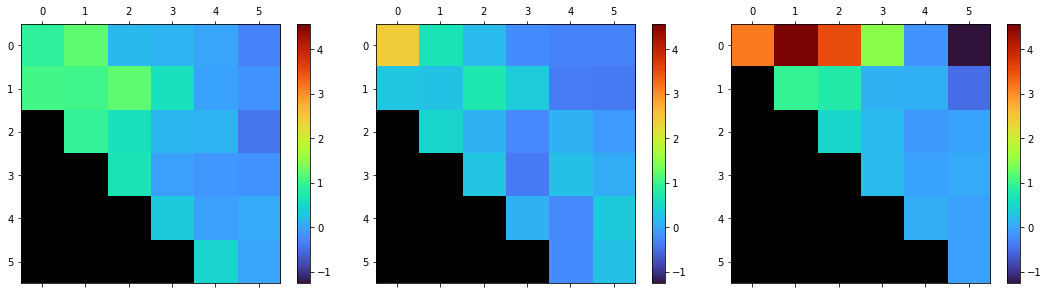

In [30]:
plf.plot_matrices(matrices=[H, ZTHZ, Z.T@M], size=(15,4), tol=1e-8, shape=(1,3))

### Compare with the result produced by function `mca.Francis_QR_step`

In [31]:
H_function = H.copy()
mca.Francis_QR_step(H=H_function)

In [34]:
np.allclose(H_function, ZTHZ)

True

In [35]:
Z

array([[ 0.68 , -0.541, -0.217,  0.031, -0.419,  0.149],
       [ 0.663,  0.487, -0.158, -0.189,  0.513, -0.006],
       [ 0.314,  0.144,  0.802,  0.331, -0.176, -0.31 ],
       [ 0.   ,  0.671, -0.232,  0.091, -0.672,  0.19 ],
       [ 0.   ,  0.   ,  0.481, -0.557, -0.05 ,  0.675],
       [ 0.   ,  0.   ,  0.   ,  0.731,  0.276,  0.624]])